In [0]:
from google.colab import files #To import file in colab
import numpy as np #numerical operations
import pandas as pd #Dataframe operations
import matplotlib.pyplot as plt #For graphs
%matplotlib inline
from matplotlib.pyplot import figure# To enlarge plots

In [2]:
#Upload XLSX file. For out of colab, use pd.read_csv to read file and ensure that file is in same directory as code file (else use os/sys and define file path to XLSX file)
files.upload()

Saving UrbanClap.xlsx to UrbanClap.xlsx


{'UrbanClap.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00|l\x98\x16l\x01\x00\x00\xa0\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [180]:
!ls

sample_data  UrbanClap.xlsx


# Setting-Up

In [0]:
file = pd.ExcelFile('UrbanClap.xlsx')
df = file.parse('Sheet1')

In [182]:
df.columns

Index(['Transaction_ID', 'Profile ID', 'Date_of_Booking',
       'Date_of_Service_Requested', 'Source',
       'Slot of Booking (Hour of the Day)'],
      dtype='object')

In [0]:
#change column name to remove whitespaces in between for convenience.
col_dict = {'Slot of Booking (Hour of the Day)': 'Booking_hour', 'Profile ID': 'profile_id'}   ## Changing to appropriate variable name
df.columns = [col_dict.get(x, x) for x in df.columns]

In [0]:
#No use of transaction ID in analysis, so remove it!
df1 = df.drop('Transaction_ID',axis=1) 

# Part-1

In [0]:
#Part 1 or A

#Drop columns 'Date_of_Booking','Source','Booking_hour', not required in part A.
df_A = df1.drop(['Date_of_Booking','Source','Booking_hour'],axis=1)

In [0]:
#For time and/or date related operations
import time, datetime
import calendar
from datetime import time, date, datetime,timedelta

date_format ='%Y-%m-%d'

In [0]:
start = min(df_A['Date_of_Service_Requested'])
end = max(df_A['Date_of_Service_Requested'])

#Will be used ahead in analysis. Year and month as integers (Jan =01, Feb =02 etc.)
start_year = int(start.strftime('%Y'))  
end_year = int(end.strftime('%Y')) 

start_month = int(start.strftime('%m'))
end_month = int(end.strftime('%m'))

In [188]:
#ith_month: start_month is 1st month, next month is 2nd and so on. For this dataset Dec_2017 is 1st month , Jan_2018 is second month and so on.
#Note that i_th month for each month is unique.
df_A['ith_month'] =  0 #default value
df_A.head()

profile_id Date_of_Service_Requested  ith_month
0           1                2018-05-21          0
1           1                2018-09-23          0
2           2                2018-11-13          0
3           3                2018-04-16          0
4           3                2018-08-06          0

In [0]:
#I_th month for each row in df_A.
for value in df_A.index:
  df_A.loc[value,'ith_month'] = (int(df_A.loc[value,'Date_of_Service_Requested'].strftime('%Y')) - start_year)*12 + (int(df_A.loc[value,'Date_of_Service_Requested'].strftime('%m')) - start_month) +1


In [0]:
#Dictionary for holding lists of new user-ids. For new-users' list, its ith_month value = its key in users dictionary.
users = {}
for all_ith in df_A['ith_month'].unique():
  users[all_ith] = []


In [191]:
df_A = df_A.sort_values('Date_of_Service_Requested')
df_A = df_A.reset_index(drop = True)
df_A.head(10)

profile_id Date_of_Service_Requested  ith_month
0        1905                2017-12-01          1
1        9000                2017-12-01          1
2         257                2017-12-01          1
3       12165                2017-12-01          1
4        6742                2017-12-01          1
5       11843                2017-12-01          1
6       10694                2017-12-01          1
7        1982                2017-12-01          1
8       12631                2017-12-01          1
9        5234                2017-12-01          1

In [0]:
#user_list keep track of all users and remove duplicates.
user_list = []
for value in df_A.index:
  if df_A.loc[value,'profile_id'] not in user_list:
    user_list.append(df_A.loc[value,'profile_id'])
    users[df_A.loc[value,'ith_month']].append(df_A.loc[value,'profile_id']) #Puts user-id list in appropriate key in dict
  

In [0]:
#Function that converts ith_month to its appropriate month name in format "Mmm_YYYY" eg. "Jan_2018". Useful for graph.
def ith_month_to_month_name(ith_month,start_month,start_year):
  
  val = ith_month-1 + start_month #-1 because ith_month has +1 in end
  end_month = val%12 
  
  if end_month ==0: end_month =12 #for all Decembers .. note we are using mod 12!
  
  end_year = int((val-1)/12)+start_year
  
  month_name = calendar.month_abbr[end_month] + '_' + str(end_year) #Names the month in form: "Jan_2018"
  return month_name

In [0]:
#Returns ith_month based on current month,current year,starting month & starting year.
def ith_month_function(curr_month,curr_year,start_month,start_year):
  return(1+ (curr_month-start_month) +(curr_year-start_year)*12)

In [0]:
#For X and Y values of bar chart
X_bar = []
Y_bar = []

for keys in sorted(users.keys()):
  X_bar.append(ith_month_to_month_name(int(keys),start_month,start_year)) #month names in X
  Y_bar.append(len(users[keys])) #no. of new users = length of array corresponding to item of it_month =keys

In [0]:
bar = pd.DataFrame({'No_of_users':Y_bar,'Month':X_bar})

In [197]:
bar.head()

Month  No_of_users
0  Dec_2017         2237
1  Jan_2018         1921
2  Feb_2018         1569
3  Mar_2018         1497
4  Apr_2018         1367

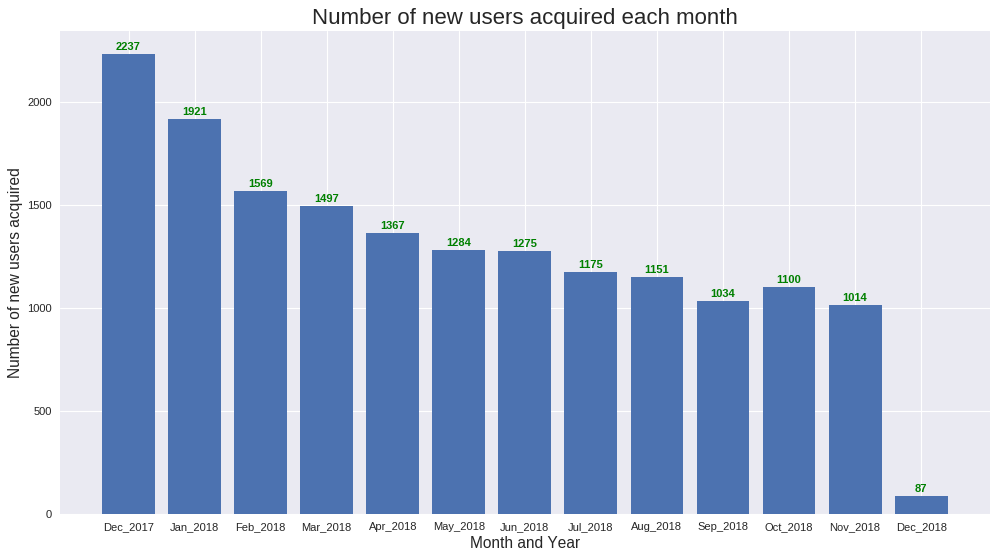

In [198]:
#Matplotlib bar chart 
objects = bar['Month']
x_positions = np.arange(len(objects))
Y_values = bar['No_of_users']

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('Number of new users acquired',fontsize = 14)
plt.xlabel('Month and Year',fontsize = 14)
plt.title('Number of new users acquired each month', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+20, str(Y_values[i]),ha = 'center', color='green', fontweight='bold') # For labels above each bar
plt.show()

# Part-2 & 3

In [0]:
#Part 2

#Since we are checking for Dec-2017:
desired_month_no = 12 #In numbers please
desired_year = 2017 #In numbers please


In [200]:
#Sorting based on profile-id.
df_A = df_A.sort_values(['profile_id'])
df_A = df_A.reset_index(drop=True)
df_A.head()

profile_id Date_of_Service_Requested  ith_month
0           1                2018-09-23         10
1           1                2018-05-21          6
2           2                2018-11-13         12
3           3                2018-08-06          9
4           3                2018-04-16          5

In [201]:
#df_A has ith_month column. To add it to original dataframe, use merge.
df_2 = pd.DataFrame.merge(df_A,df1,on = ['profile_id','Date_of_Service_Requested'])
df_2.head()



profile_id Date_of_Service_Requested  ith_month Date_of_Booking Source  \
0           1                2018-09-23         10      2018-09-23      C   
1           1                2018-05-21          6      2018-05-20      D   
2           2                2018-11-13         12      2018-11-10      C   
3           3                2018-08-06          9      2018-08-05      B   
4           3                2018-04-16          5      2018-04-12      B   

   Booking_hour  
0             8  
1            14  
2            11  
3            11  
4             8

In [202]:
#df_B is dataframe for part two and three. Remove columns: 'Date_of_Service_Requested','Source' & 'Booking_hour'.
df_B = df_2.drop(['Date_of_Service_Requested','Source','Booking_hour'],axis =1)
df_B.head()

profile_id  ith_month Date_of_Booking
0           1         10      2018-09-23
1           1          6      2018-05-20
2           2         12      2018-11-10
3           3          9      2018-08-05
4           3          5      2018-04-12

In [0]:
#Receive variables:
# desired_month_no: Month of concerned timeperiod eg. = 3 for March 2018
# desired_year : Year of concerned timeperiod eg. = 2018 for March 2018
# no_of_month_of_users: To select users from multiple months combined if needed. eg. =3 if Jan-Mar 2018; =1 if Jan 2018.
# repeat_rate_days : No. of days for repeat rate. eg. For 90-day repeat rate, it will be 90.

def percentage_of_new_users(desired_month_no,desired_year,no_of_month_of_users,repeat_rate_days):
  
  assert(1<=desired_month_no<=12)
  
  assert(1970<=desired_year<=2100)
  
  #Ith month for desired year
  ith_month = ith_month_function(desired_month_no,desired_year,start_month,start_year)
  
  extra_months = no_of_month_of_users
  #To find range of month for given timeperiod 
  ith_month_range = np.arange(ith_month,ith_month+extra_months,step =1) 
  
  #empty array for unique users in desired months
  user_df = np.array([],dtype ='int').reshape(0,0)
  
  
  #Taking user-id from users dictionary and concatenating for each month
  for value in ith_month_range:
    array = np.array(users[value]).reshape(len(users[value]),1)
    
    if len(user_df) == 0: user_df = array #if empty array
    else:
      user_df = np.concatenate((user_df, array), axis =0) #else concatenate, if multiple months
      
    #print(value, len(user_df)) #For testing
  
  assert(len(np.unique(user_df)) == len(user_df)) 
  
  user_df = sorted(user_df) #To avoid disorder in user-id values: sort it!
  
  if len(user_df) ==0 : raise AssertionError('No users in this time period!') #When you enter month and/or year which is not in dataset.
  
  #Counts no. of repeat users
  count_repeat_users = 0
  
  for each_user in user_df:                                                     #Line A
    small_df = df_B.loc[df_B['profile_id'].isin(each_user)]
    small_df = small_df.sort_values('Date_of_Booking')
    small_df = small_df.reset_index(drop=True)
    
    if len(small_df)>1: #If len(small_df) = 1, means user only ordered once overall.
      
      first_day = small_df.loc[0,'Date_of_Booking']
      second_day = small_df.loc[1,'Date_of_Booking']
    
      if (second_day-first_day).days <= repeat_rate_days: #Difference between booking dates <= repeat_rate_days
        count_repeat_users +=1
        
#Comment out below to test: (note to use user_df's small subset in Line A)

        #if (second_day-first_day).days ==0:
          #print(small_df.loc[1,'profile_id'],(second_day-first_day).days)
      
  percentage = round(count_repeat_users*100/len(user_df),3)
  
  return percentage,count_repeat_users,len(user_df) #outputs percentage, no. of repeat users and total no. of users for timeperiod entered.
    


In [204]:
#Part-2
percentage_of_new_users(12,2017,1,30)

(16.942, 379, 2237)

| User Month      | Percentage | No. of Users Repeated    | Total No. of Users     | Repeat Rate-days|
| :---        |    :----:   |       :----:   |    :----:   |     ---: |
| Dec  18|    16.942| 379   |2237|30|

In [205]:
#Part-3
percentage_of_new_users(1,2018,1,90),  percentage_of_new_users(2,2018,1,90),percentage_of_new_users(3,2018,1,90),percentage_of_new_users(1,2018,3,90)

((24.831, 477, 1921),
 (20.204, 317, 1569),
 (17.635, 264, 1497),
 (21.215, 1058, 4987))

| User Month      | Percentage | No. of Users Repeated    | Total No. of Users     |Repeat Rate-days|
| :---        |    :----:   |       :----:   | :----:   |        ---: |
| Jan  18| 24.831| 477   |1921|90|
| Feb   18| 20.204| 317   |1569|90|
| Mar 18  |17.635| 264   |1497|90|
| Jan-Mar 18  | 21.215| 1058   |4987|90|


# Part-5

In [206]:
#part-5

#New frequency table for frequencies
freq_table = pd.DataFrame()
freq_table['profile_id'] = df_2.profile_id.unique() #All unique ID on df_2
freq_table['frequency_90_day_repeat'] =-1 #Default value

freq_table.head()

profile_id  frequency_90_day_repeat
0           1                       -1
1           2                       -1
2           3                       -1
3           4                       -1
4           5                       -1

In [207]:
# drop columns 'Date_of_Booking','Source','Booking_hour' for part-5
df_5 = df_2.drop(['Date_of_Booking','Source','Booking_hour'],axis=1).sort_values(['profile_id','Date_of_Service_Requested']).reset_index(drop=True)
df_5.head()

profile_id Date_of_Service_Requested  ith_month
0           1                2018-05-21          6
1           1                2018-09-23         10
2           2                2018-11-13         12
3           3                2018-04-16          5
4           3                2018-08-06          9

In [0]:
#Set repeat rate days for part 5.
repeat_rate_days_5 = 90

In [0]:
#For frequency:

#using index to loop
for value in freq_table.index:
  
  #small subset of df_5 where profile id in frequency table and df_5 are same.
  table = df_5.loc[df_5['profile_id'] == (freq_table.loc[value,'profile_id']) ]
  table = table.reset_index(drop=True) #Resetting index for easier looping at desired order
  
  if len(table) ==1: #If user has ordered only once -> then repeat rate is zero
    freq_table.loc[value,'frequency_90_day_repeat'] = 0
  else:
    table_len = len(table)
    
    assert(table_len>1)
    
    #To count frequency of a profile-id
    count_freq = 0
    
    #Iterate from index 0 to table_len-2, as we are comparing (iteration+1)-th time with iteration-th time.
    for iteration in range(0,table_len-1,1): 
      #Add when difference is less than repeat rate days:
      if (table.loc[iteration+1,'Date_of_Service_Requested'] - table.loc[iteration,'Date_of_Service_Requested']).days<= repeat_rate_days_5: count_freq +=1
    
    freq_table.loc[value,'frequency_90_day_repeat'] = count_freq

In [0]:
#for distribution chart:
dist_chart_X = sorted(freq_table['frequency_90_day_repeat'].unique())
dist_chart_Y = [0]*len(dist_chart_X)

dist_chart = pd.DataFrame({'No_of_times_occured':dist_chart_Y,'Frequency_values':dist_chart_X})

for index in freq_table.index: 
  value_in = freq_table.loc[index,'frequency_90_day_repeat']
  
  chart_table_index = dist_chart.loc[dist_chart['Frequency_values'] == value_in].index #Only single value .. no range in index
  
  #To test:
  #print('dist_chart:',dist_chart.loc[dist_chart['Frequency_values'] == value_in], '\n Index:', chart_table_index)
  
  dist_chart.loc[chart_table_index,'No_of_times_occured'] +=1

In [211]:
dist_chart.head()

Frequency_values  No_of_times_occured
0                 0                13450
1                 1                 1546
2                 2                  548
3                 3                  318
4                 4                  176

##80.4% of all users never order again! 

In [212]:
dist_chart.loc[0,'No_of_times_occured']/sum(dist_chart.loc[:,'No_of_times_occured'])

0.80485907486087

###Not a good graph! But original data-based.

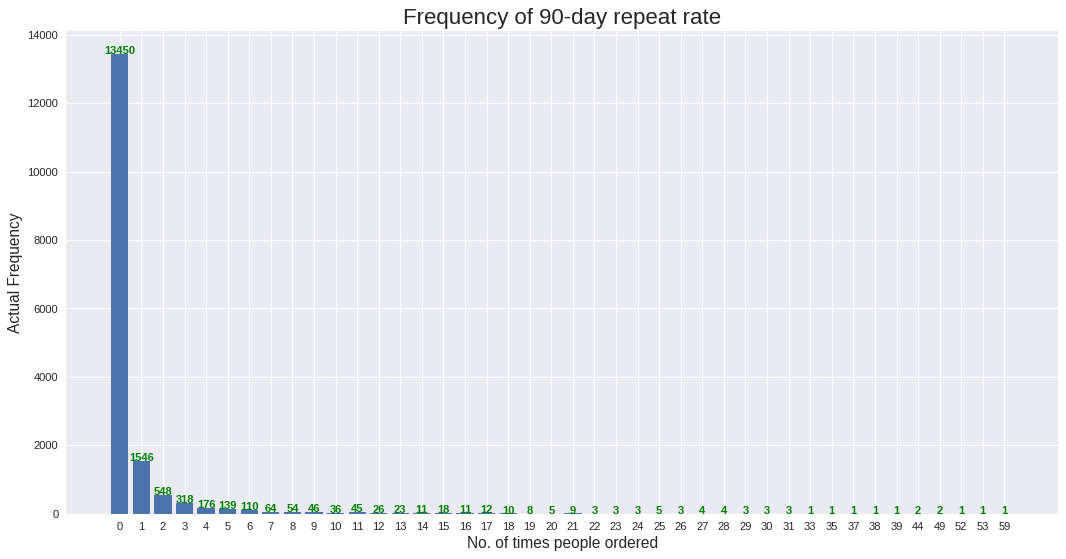

In [213]:
#matplotlib bar chart
objects = dist_chart['Frequency_values']
x_positions = np.arange(len(objects))
Y_values = dist_chart['No_of_times_occured']


figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot


    
plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('Actual Frequency',fontsize = 14)
plt.xlabel('No. of times people ordered',fontsize = 14)
plt.title('Frequency of 90-day repeat rate', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+0.1, str(Y_values[i]),ha = 'center', color='green', fontweight='bold') #For labeliing actual value on top.
plt.show()

###A good graph due to large size and labels.... and resonable limit.

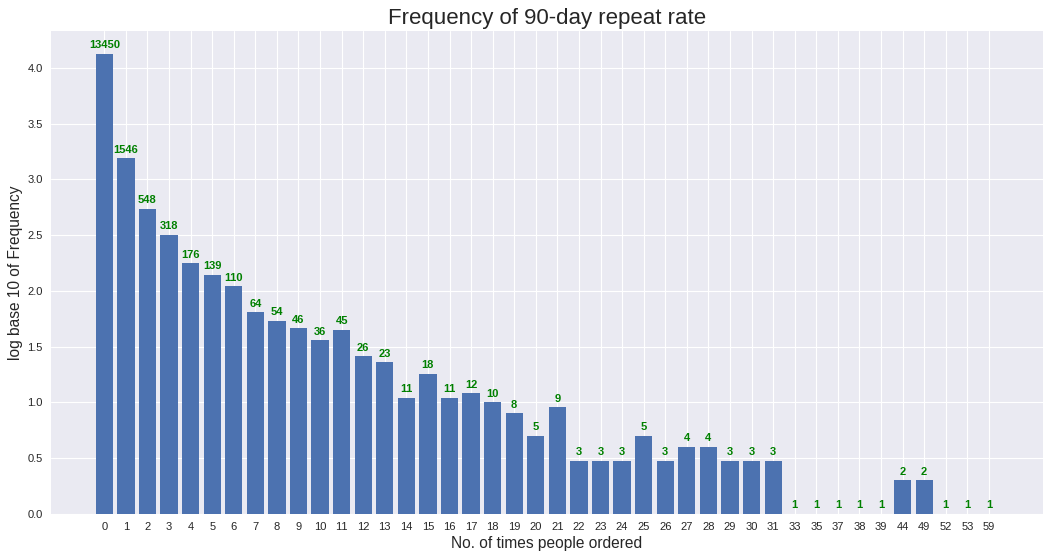

In [214]:
#matplotlib bar chart
objects = dist_chart['Frequency_values']
x_positions = np.arange(len(objects))
Y_values = dist_chart['No_of_times_occured']

Y_actual = np.log10(Y_values) #Taking log beacuse graph is too lopsided: 0 and 1 have too many occurences than others.


figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot


    
plt.bar(x_positions, Y_actual, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('log base 10 of Frequency',fontsize = 14)
plt.xlabel('No. of times people ordered',fontsize = 14)
plt.title('Frequency of 90-day repeat rate', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_actual[i]+0.05, str(Y_values[i]),ha = 'center', color='green', fontweight='bold') #For labeliing actual value on top.
plt.show()

# Part-4

In [0]:
#Part-4
set_month_number = 11 #November 2018
set_year_number = 2018

ith_month_number = ith_month_function(set_month_number,set_year_number,start_month,start_year)
assert(ith_month_number>1)
user_part_4_list = sorted(users[ith_month_number]) #new user-ids acquired in corresponding ith_month, here its for Nov_2018

In [0]:
X_train = []
Y_train = []

X_test = []
Y_test = []

In [217]:
# preparing X_train, Y_train, X_test and Y_test 
df_2['Gap_in_days'] = 0
for index_value in df_2.index:
  df_2.loc[index_value,'Gap_in_days'] = (df_2.loc[index_value,'Date_of_Service_Requested'] - df_2.loc[index_value,'Date_of_Booking']).days

df_2.head()

profile_id Date_of_Service_Requested  ith_month Date_of_Booking Source  \
0           1                2018-09-23         10      2018-09-23      C   
1           1                2018-05-21          6      2018-05-20      D   
2           2                2018-11-13         12      2018-11-10      C   
3           3                2018-08-06          9      2018-08-05      B   
4           3                2018-04-16          5      2018-04-12      B   

   Booking_hour  Gap_in_days  
0             8            0  
1            14            1  
2            11            3  
3            11            1  
4             8            4

In [218]:
df_4a = df_2.loc[df_2.ith_month <= ith_month_number].sort_values(['profile_id','Date_of_Booking']).reset_index(drop=True) #Remove data after i_th month
df_4a.head()

profile_id Date_of_Service_Requested  ith_month Date_of_Booking Source  \
0           1                2018-05-21          6      2018-05-20      D   
1           1                2018-09-23         10      2018-09-23      C   
2           2                2018-11-13         12      2018-11-10      C   
3           3                2018-04-16          5      2018-04-12      B   
4           3                2018-08-06          9      2018-08-05      B   

   Booking_hour  Gap_in_days  
0            14            1  
1             8            0  
2            11            3  
3             8            4  
4            11            1

In [0]:
total_list = sorted(df_4a['profile_id'].unique())
X_total = pd.DataFrame()

for user_id in total_list:
  df_4a_subset = df_4a.loc[df_4a['profile_id'] == user_id]
  df_4a_subset = df_4a_subset.sort_values(['Date_of_Booking']).reset_index(drop= True) #Reset index to drop easily in next step.
  #only interested in first time booking of any user
  if len(df_4a_subset)>1: df_4a_subset = df_4a_subset.drop(index=range(1,len(df_4a_subset)))

  if len(X_total) ==0: X_total = df_4a_subset #When X_train is empty
  else:
    X_total = pd.concat(objs = [X_total,df_4a_subset],axis=0,ignore_index =True)#else concenate row-wise


In [0]:
X_total['90_day_frequency']=0

for index in range(len(X_total)):
  user_id_value = X_total.loc[index,'profile_id']
  X_total.loc[index,'Booking_hour'] = str(X_total.loc[index,'Booking_hour']) #There is no relation between each booking hour!
  X_total.loc[index,'Gap_in_days'] = str(X_total.loc[index,'Gap_in_days'])
  mini_df = freq_table.loc[ freq_table.profile_id == user_id_value]
  
  final_value = mini_df.loc[int(user_id_value)-1,'frequency_90_day_repeat']
  
  X_total.loc[index,'90_day_frequency'] = final_value
  #if final_value !=0: print('index:',index,X_total.loc[index,'90_day_frequency'])
  

In [0]:
X_total = X_total.drop(['Date_of_Service_Requested','Date_of_Booking'],axis =1)

In [222]:
X_AB = X_total
X_AB.head()#For EDA Analysis

profile_id  ith_month Source Booking_hour Gap_in_days  90_day_frequency
0           1          6      D           14           1                 0
1           2         12      C           11           3                 0
2           3          5      B            8           4                 0
3           4          4      A           13           3                 0
4           5          2      C           14           1                 0

In [0]:
X_total = pd.get_dummies(data = X_total)

In [0]:
XY_train = X_total.loc[X_total['ith_month'] < ith_month_number].drop(['profile_id','ith_month'],axis=1).reset_index(drop=True)
XY_test = X_total.loc[X_total['ith_month'] == ith_month_number].drop(['profile_id','ith_month'],axis=1).reset_index(drop=True)

In [0]:
Y_train = XY_train['90_day_frequency']
X_train = XY_train.drop(['90_day_frequency'],axis = 1)

Y_test_actual = XY_train['90_day_frequency']
X_test = XY_train.drop(['90_day_frequency'],axis = 1)

##Setting up for Logistic Regression:

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
clf = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', max_iter = 10000)
cl = clf.fit(X_train, Y_train)


prediction = cl.predict(X_test)


##Logistic Regression is predicting zero for all users. Not good :(

In [0]:
Y_test = pd.DataFrame({'90_day_frequency':prediction})
user_dataframe = pd.DataFrame({'profile_id':sorted(user_part_4_list)})

In [0]:
Output = user_dataframe.join(other=[Y_test])

In [138]:
Output.head()

profile_id  90_day_frequency
0           2                 0
1           8                 0
2          21                 0
3          62                 0
4          85                 0

#EDA Analyses below

##No. of users each month

In [0]:
X_bar=[] #ith_month
Y_bar=[] #No. of users in month

for value in sorted(users.keys()):
  X_bar.append(ith_month_to_month_name(value,start_month,start_year))
  data = df_2.loc[df_2['ith_month'] == value]
  Y_bar.append( len(data['profile_id'].unique()))
  data = []

In [140]:
X_bar, Y_bar

(['Dec_2017',
  'Jan_2018',
  'Feb_2018',
  'Mar_2018',
  'Apr_2018',
  'May_2018',
  'Jun_2018',
  'Jul_2018',
  'Aug_2018',
  'Sep_2018',
  'Oct_2018',
  'Nov_2018',
  'Dec_2018'],
 [2237, 2311, 2128, 2230, 2206, 2218, 2248, 2240, 2276, 2196, 2321, 2272, 220])

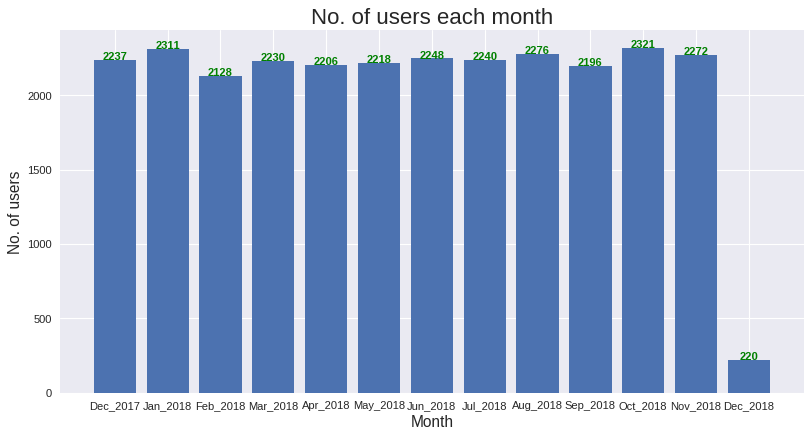

In [141]:
#matplotlib bar chart
objects = X_bar
x_positions = np.arange(len(objects))
Y_values = Y_bar

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('No. of users',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.title('No. of users each month', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+1, str(Y_values[i]),ha = 'center', color='green', fontweight='bold') #For labeliing actual value on top.
plt.show()

In [0]:
import seaborn as sns

In [0]:
data = df_2.loc[:,'Source':'Gap_in_days']


##Source Distribution

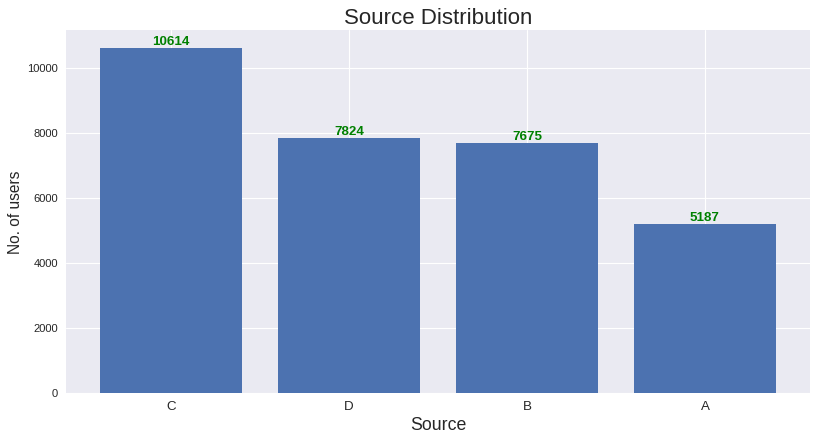

In [167]:
A1 = pd.DataFrame({'Source': data['Source'].value_counts().index, 'No_of_Users': data['Source'].value_counts().values})

#matplotlib bar chart
objects = A1['Source']
x_positions = np.arange(len(objects))
Y_values = A1['No_of_Users']

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects, fontsize = 12)
plt.ylabel('No. of users',fontsize = 14)
plt.xlabel('Source',fontsize = 16)
plt.title('Source Distribution', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+100, str(Y_values[i]),ha = 'center', color='green', fontweight='bold', fontsize = 12) #For labeliing actual value on top.
plt.show()

##Booking hour Distribution

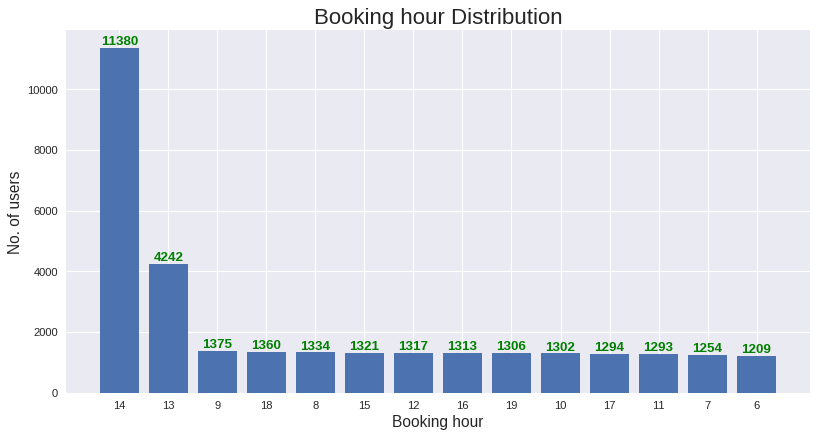

In [165]:
A2 = pd.DataFrame({'Booking_hour': data['Booking_hour'].value_counts().index, 'No_of_Users': data['Booking_hour'].value_counts().values})

#matplotlib bar chart
objects = A2['Booking_hour']
x_positions = np.arange(len(objects))
Y_values = A2['No_of_Users']

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('No. of users',fontsize = 14)
plt.xlabel('Booking hour',fontsize = 14)
plt.title('Booking hour Distribution', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+100, str(Y_values[i]),ha = 'center', color='green', fontweight='bold', fontsize = 12) #For labeliing actual value on top.
plt.show()

In [0]:
data_peak = data.loc[data['Booking_hour'].isin([14,13])]

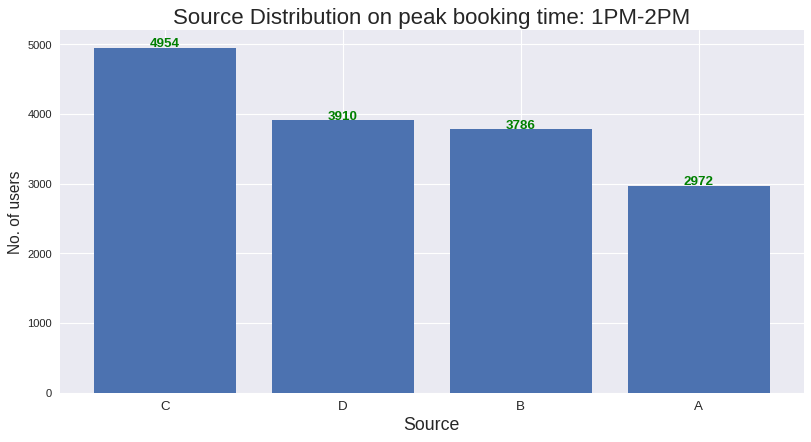

In [176]:
A1 = pd.DataFrame({'Source': data_peak['Source'].value_counts().index, 'No_of_Users': data_peak['Source'].value_counts().values})

#matplotlib bar chart
objects = A1['Source']
x_positions = np.arange(len(objects))
Y_values = A1['No_of_Users']

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects, fontsize = 12)
plt.ylabel('No. of users',fontsize = 14)
plt.xlabel('Source',fontsize = 16)
plt.title('Source Distribution on peak booking time: 1PM-2PM', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+10, str(Y_values[i]),ha = 'center', color='green', fontweight='bold', fontsize = 12) #For labeliing actual value on top.
plt.show()

##Gap in days Distribution

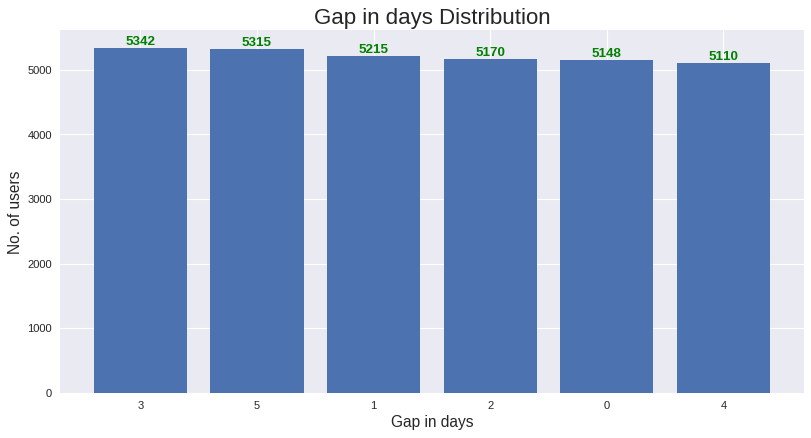

In [164]:
A3 = pd.DataFrame({'Gap_in_days': data['Gap_in_days'].value_counts().index, 'No_of_Users': data['Gap_in_days'].value_counts().values})

#matplotlib bar chart
objects = A3['Gap_in_days']
x_positions = np.arange(len(objects))
Y_values = A3['No_of_Users']

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #Enlarge plot

plt.bar(x_positions, Y_values, align='center', alpha=1)
plt.xticks(x_positions, objects)
plt.ylabel('No. of users',fontsize = 14)
plt.xlabel('Gap in days',fontsize = 14)
plt.title('Gap in days Distribution', fontsize =20)

for i in range(len(x_positions)):
    plt.text(x_positions[i] ,Y_values[i]+50, str(Y_values[i]),ha = 'center', color='green', fontweight='bold', fontsize = 12) #For labeliing actual value on top.
plt.show()

#Thank you for task! And spending time to read and understand the code. :)

-Rajnish Singh